# Exploration of Geographic Patterns 

This notebook explores geographic patterns of the orbiting satellites and their dStec/dt values over time, the tracked in [this issue](https://github.com/vc1492a/sTEC-d-dt-Anomaly-Detection/issues/3). 

In [82]:
import sys; sys.executable

'/Users/vconstan/Files/Projects/tsunami/venv/bin/python'

## Imports

In [168]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import plotly.express as px
import probscale
# read mapbox access token 
px.set_mapbox_access_token(open("../.mapbox_token").read())
import seaborn as sns
from src import data

## Read Data 

Let's select a particular day, location, and year of data to load for further exploration. We define those variables first below. 

In [102]:
# year = 2015
# doy = 259 # 259 is the day of the earthquake
# location = "chile" # can be chile, hawaii

In [234]:
year = 2012
doy = 302 # 302 is the day of the earthquake
location = "hawaii" # can be chile, hawaii

In [235]:
# read in the data 
df = data.read_day(
    location=location,
    year=year,
    day_of_year=doy
)

  1%|          | 8/1597 [00:00<00:20, 78.07it/s]

Reading dataframes...


100%|██████████| 1597/1597 [00:21<00:00, 73.52it/s]


Concatenating dataframes...


In [236]:
df.head()

,mles__G30,mles__G30_lon,mles__G30_lat,mles__G30_h_ipp,mles__G30_ele,mles__G30_azi,pgf4__G28,pgf4__G28_lon,pgf4__G28_lat,pgf4__G28_h_ipp,...,kaep__G03_lat,kaep__G03_h_ipp,kaep__G03_ele,kaep__G03_azi,mles__G29,mles__G29_lon,mles__G29_lat,mles__G29_h_ipp,mles__G29_ele,mles__G29_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-28 00:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:00:30,0.007485,-157.084116,18.083569,350022.032541,55.567099,226.815319,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.009645,-146.683385,15.679230,349986.270917,13.435877,112.603594
2012-10-28 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:01:00,0.007452,-157.084745,18.066226,349993.349675,55.395757,226.471406,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.011897,-146.647307,15.628373,350017.320874,13.313939,112.794484
2012-10-28 00:01:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df.columns.values

array(['mles__G30', 'mles__G30_lon', 'mles__G30_lat', ...,
       'mles__G29_h_ipp', 'mles__G29_ele', 'mles__G29_azi'], dtype=object)

In [238]:
df[df.columns.values[5]].describe()

count    995.000000
mean     211.366621
std       88.575402
min       58.794698
25%      111.889692
50%      207.941760
75%      307.380441
max      323.975317
Name: mles__G30_azi, dtype: float64

### Create a Normalized Dataframe

In [245]:
from sklearn.preprocessing import minmax_scale

def normalize(dataframe: 'pd.DataFrame', minimum: int = 0, maximum: int = 1) -> 'pd.DataFrame':
    """
    Normalizes the dStec/dt values on a scale from 0 to 1.
    :param dataframe: a dataframe created by the read_day function that
    contains dStec/dt values.
    :return: a dataframe identical to the input dataframe, but with
    normalized values.
    """

    for col in dataframe.columns.values:        
        if len(col.split("__")[1]) == 3:            
            dataframe[col] = minmax_scale(X=dataframe[col],feature_range=(0,1))
                        
    return dataframe

In [246]:
df_normalized = normalize(df)

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning:

All-NaN slice encountered

/Users/vconstan/Files/Projects/tsunami/venv/lib/python3.7/site-packages/sklearn/preproce

In [247]:
df_normalized.head()

,mles__G30,mles__G30_lon,mles__G30_lat,mles__G30_h_ipp,mles__G30_ele,mles__G30_azi,pgf4__G28,pgf4__G28_lon,pgf4__G28_lat,pgf4__G28_h_ipp,...,kaep__G03_lat,kaep__G03_h_ipp,kaep__G03_ele,kaep__G03_azi,mles__G29,mles__G29_lon,mles__G29_lat,mles__G29_h_ipp,mles__G29_ele,mles__G29_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-28 00:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:00:30,0.699561,-157.084116,18.083569,350022.032541,55.567099,226.815319,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.545920,-146.683385,15.679230,349986.270917,13.435877,112.603594
2012-10-28 00:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 00:01:00,0.698715,-157.084745,18.066226,349993.349675,55.395757,226.471406,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.646378,-146.647307,15.628373,350017.320874,13.313939,112.794484
2012-10-28 00:01:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
df_normalized["mles__G30"].describe()

count    995.000000
mean       0.560158
std        0.178249
min        0.000000
25%        0.462981
50%        0.549098
75%        0.672454
max        1.000000
Name: mles__G30, dtype: float64

The data contains a Pandas DateTime index to provide indications of the time in which the observation was recorded (the index) and columns which correspond to the `dStec/dt`, `lon`, and `lat` of each cobination of sattelite, ground station readings. This information can be used to not only plot the `dStec.dt` values through time, but according to a specific geographic location (the `lat`, `lon` columns). 

In [250]:
def geographic_dataframe(dataframe: pd.DataFrame, satellites: list = None, ground_stations: list = None) -> 'pd.DataFrame': 
    """
    Constructs a dataframe that can be used for plotting or subsequent analysis which is pivoted 
    so that there are columns for latitude and longitude coordiantes and dStec/dt values. Returns 
    a pandas dataframe. 
    
    :param dataframe: an input pandas dataframe that contains dStec/dt values for pairs of satellite, ground station 
    combinations. 
    :param satellites: a list of satellites to retain in the reformatting. 
    :param ground_stations: a list of ground stations to retain in the reformatting. 
    """
    
    # get lists of all satellites and ground stations 
    # if none, use all satellites    
    # else, filter for the satellites provided in the input list 
    if satellites is None: 
        satellites = list(set([col_name.split("__")[0] for col_name in dataframe.columns.values]))
    
    # if none, use all ground stations 
    # if ground stations specified, then filter the selection of satellites 
    if ground_stations is None: 
        ground_stations = list(set([col_name.split("__")[1] for col_name in dataframe.columns.values]))
    
    # filter the dataframe for those ground stations and satellites 
    dataframe = dataframe.loc[:, dataframe.columns.str.contains("|".join(satellites))]
    dataframe = dataframe.loc[:, dataframe.columns.str.contains("|".join(ground_stations))]
    
    # melt all of the dStec/dt values from the satellites into single column, same with lat and lon
    value_vars = [col for col in dataframe.columns.values if "lat" not in col and "lon" not in col]
    lat_vars = [col for col in dataframe.columns.values if "lat" in col]
    lon_vars = [col for col in dataframe.columns.values if "lon" in col]

    dataframe_melt = pd.melt(dataframe, id_vars=lon_vars + lat_vars, value_vars=value_vars)
    
    # combine all of the lat, lon columns 
    # TODO: there are implications to this merge operation
    dataframe_melt = dataframe_melt.assign(lat=dataframe_melt[lat_vars].mean(1)).drop(lat_vars, 1)
    dataframe_melt = dataframe_melt.assign(lon=dataframe_melt[lon_vars].mean(1)).drop(lon_vars, 1)

    # recode 0.0 lat, lon values as missing 
    dataframe_melt[["lat", "lon"]] = dataframe_melt[["lat", "lon"]].replace(0.0, np.nan)

    # extract the ground station and satellite from the dataframe and create new columns for each 
    dataframe_melt['ground_station'] = dataframe_melt['variable'].apply(lambda x: x.split("__")[1].split("_")[0])
    dataframe_melt['satellite'] = dataframe_melt['variable'].apply(lambda x: x.split("__")[0])
        
    return dataframe_melt
    

The resulting dataframe becomes very large and thus it can be difficult to visualize all of the data. For now, we'll start with a smaller range of time and select a particular hour to visualize.

In [443]:
HOUR = 9

We're going to use the normalized values for now so that we can draw relative comparisons between the satellites (and to some degree the readings across the ground stations). It is reasonable to suspect that the variations in slant electron content, `dStec/dt`, vary in their behavior depending on the conditions experienced by the satellite (location, time, etc.). 

We are focused on detecting **anomalies**, or _changes_ in the behavior of the slant electron content to support that. As such, it is not so much the raw values which are important to examine but rather the relative changes at various points in time, across satellites and geographic locations. 

In [444]:
df_time_slice = df_normalized[df_normalized.index.hour == HOUR]

In [445]:
df_time_slice.head()

,mles__G30,mles__G30_lon,mles__G30_lat,mles__G30_h_ipp,mles__G30_ele,mles__G30_azi,pgf4__G28,pgf4__G28_lon,pgf4__G28_lat,pgf4__G28_h_ipp,...,kaep__G03_lat,kaep__G03_h_ipp,kaep__G03_ele,kaep__G03_azi,mles__G29,mles__G29_lon,mles__G29_lat,mles__G29_h_ipp,mles__G29_ele,mles__G29_azi
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-10-28 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 09:00:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 09:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 09:00:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-28 09:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll start by reading the same ground stations used in experients from [Real-Time Detection of Tsunami Ionospheric Disturbances with a 
Stand-Alone GNSS Receiver: A Preliminary Feasibility Demonstration](https://www.nature.com/articles/srep46607.pdf).

In [446]:
geo_df = geographic_dataframe(
    dataframe=df_time_slice,
#     satellites=["mlpr", "kosm"],
#     ground_stations=["G13"],
    ground_stations=["G04", "G07", "G08", "G10", "G13", "G20", "G23"]
)

In [447]:
geo_df["value"].describe()

count     202640.0
unique    202060.0
top            1.0
freq           5.0
Name: value, dtype: float64

In [448]:
geo_df.sample(frac=1.).head()

,variable,value,lat,lon,ground_station,satellite
270390,mane__G04_ele,37.2929,19.698429,-154.311568,G04,mane
223449,khku__G13_azi,NaN,20.339945,-155.316892,G13,khku
254262,puka__G23_azi,65.1622,19.932140,-154.604341,G23,puka
253870,puka__G23_h_ipp,349990,19.460517,-154.055275,G23,puka
243344,mkea__G04_h_ipp,349981,19.216875,-153.817025,G04,mkea


In [449]:
geo_df.shape

(362880, 6)

There's some empty values in the dataframe because the `dStec/dt` values are not available continuously for each satellite. For the purposes of visualization, these values are not needed. 

In [450]:
geo_df = geo_df[geo_df["value"].notna()]

In [451]:
geo_df.shape

(202640, 6)

## Exploratory Geographic Visualizations

This section includes some geographic visualizations which can be used to explore the data and gain understanding - overall but also in the context of modeling to come. The work provided here, for example, should provide an indication as to whether or not there is a need to rescale or normalize the latitude and longitudinal data if it is to be included in model training. 

### Histogram of Normalized dStec/dt Values

First, we need to drop any rows that are not the `dStec/dt` values. 

In [452]:
geo_df_dstecdt = geo_df[geo_df["variable"].str.contains("ele|ipp|azi") == False].dropna()

In [453]:
geo_df_dstecdt.sample(frac=1).head(10)

,variable,value,lat,lon,ground_station,satellite
107536,khku__G23,0.803418,20.238635,-155.104187,G23,khku
109532,puka__G10,0.528534,19.974516,-154.663567,G10,puka
108658,pat2__G23,0.772142,19.537337,-154.135312,G23,pat2
329322,mlsp__G07,0.515117,20.165329,-154.941141,G07,mlsp
51884,waor__G07,0.510082,20.152316,-154.942871,G07,waor
167222,npit__G04,0.46617,19.512231,-154.108817,G04,npit
38602,ktpm__G13,0.665856,19.379124,-153.973254,G13,ktpm
126862,step__G23,0.586942,19.741151,-154.361568,G23,step
234433,yeep__G10,0.579051,19.505758,-154.174146,G10,yeep
98914,blbp__G07,0.47502,20.184497,-155.000504,G07,blbp


In [454]:
geo_df_dstecdt.shape

(50660, 6)

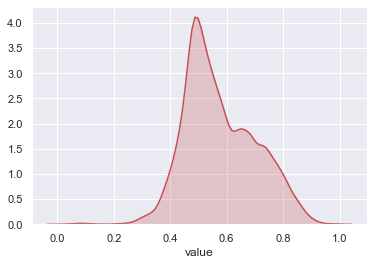

In [455]:
sns.distplot(geo_df_dstecdt["value"], hist=False, color="r", kde_kws={"shade": True})

In [456]:
fig = px.histogram(geo_df_dstecdt, x="value")
fig.show()

If there is a bi-modal or multi-modal distribution shown in the above values, consider filtering the data so that the color scales of the visualizations are interpreted correctly. 

### Distribution of Latitude and Longitude Values

Text(0.5, 1.0, 'Distribution of dStec/dt Values')

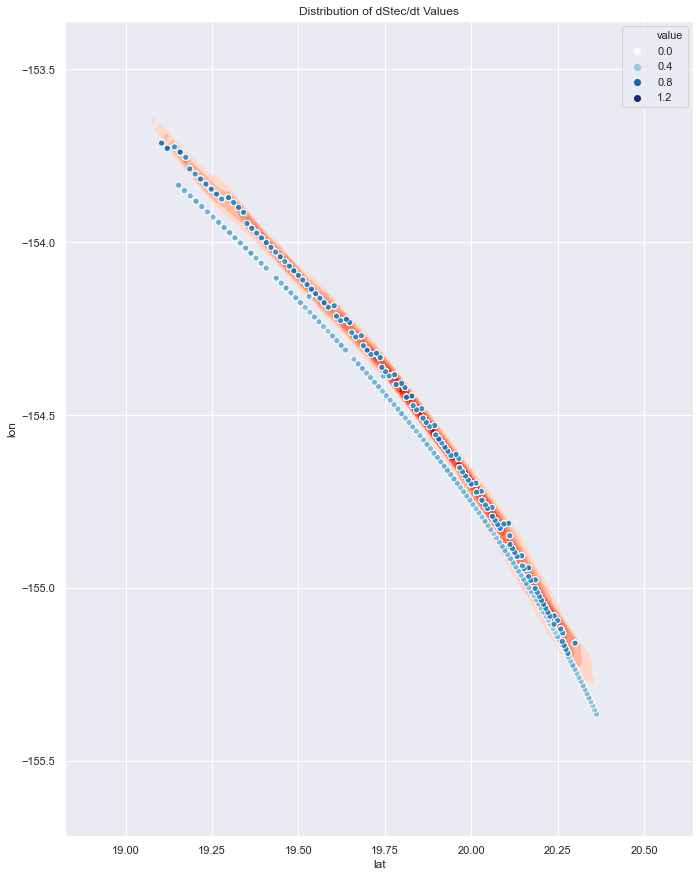

In [457]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect("equal")

ax = sns.kdeplot(geo_df_dstecdt["lat"], geo_df_dstecdt["lon"], shade=True, cmap="Reds", shade_lowest=False, cut=5)

ax = sns.scatterplot(x=geo_df_dstecdt["lat"], y=geo_df_dstecdt["lon"],
                hue=geo_df_dstecdt["value"],
                palette="Blues")

ax.set_title("Distribution of dStec/dt Values")


The above plot can provide information as to where most of the data examined originates geographically. 

### dStec/dt Values by Coordinate

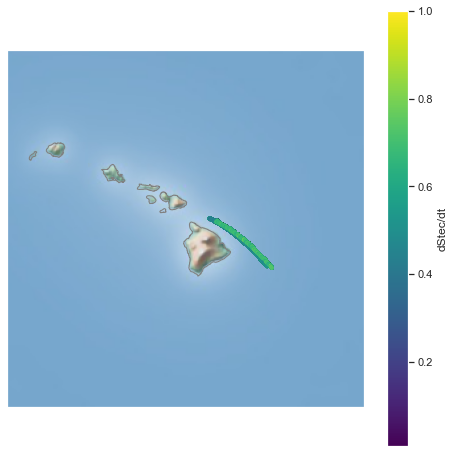

In [458]:
f, ax = plt.subplots(figsize=(8, 8))

ax = Basemap(projection='lcc', resolution='h', 
            lat_0=geo_df_dstecdt["lat"].mean()+0.3, lon_0=geo_df_dstecdt["lon"].mean()-1.5,
            width=1e6, height=1e6)
ax.shadedrelief()
ax.drawcoastlines(color='gray')
ax.drawcountries(color='gray')
ax.drawstates(color='gray')

ax.scatter(geo_df_dstecdt["lon"].values, geo_df_dstecdt["lat"].values, latlon=True,
          c=geo_df_dstecdt["value"].values, s=10,
          cmap='viridis', alpha=1.)

plt.colorbar(label="dStec/dt")


### Distributution of Values Across Ground Stations


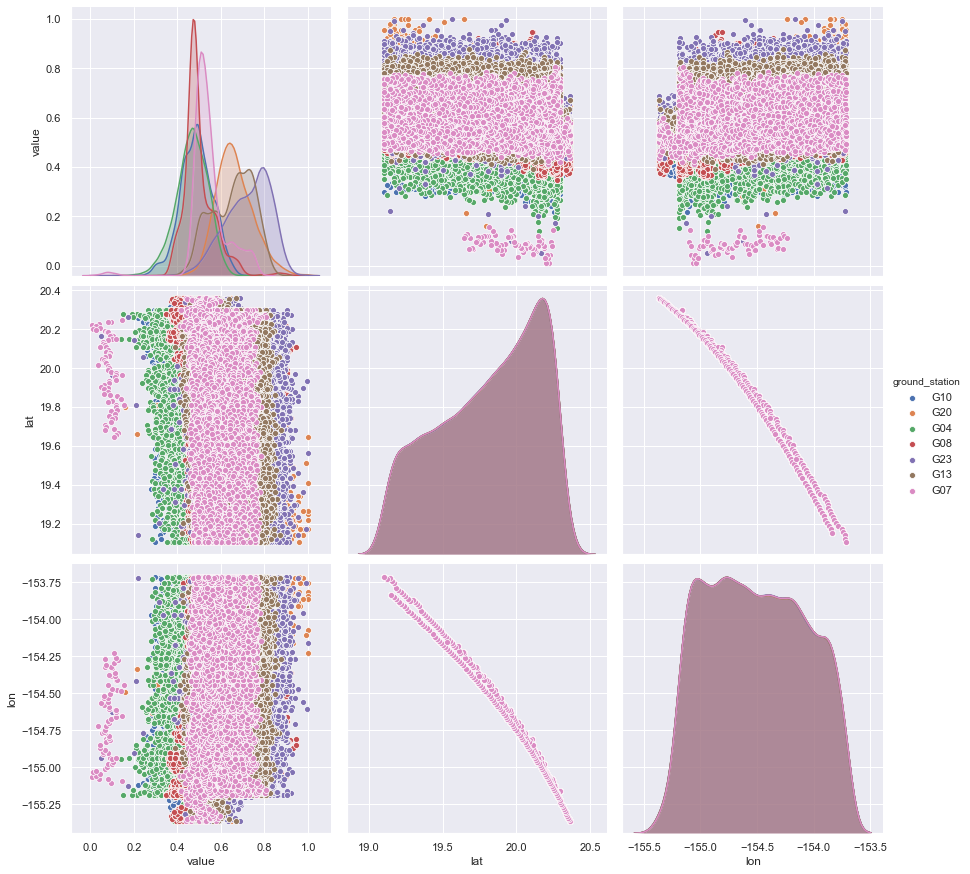

In [459]:
sns.pairplot(geo_df_dstecdt, hue="ground_station", height=4)

Using the pairplot, we are able to look at differences between the ground stations (above) and satellites (below). 

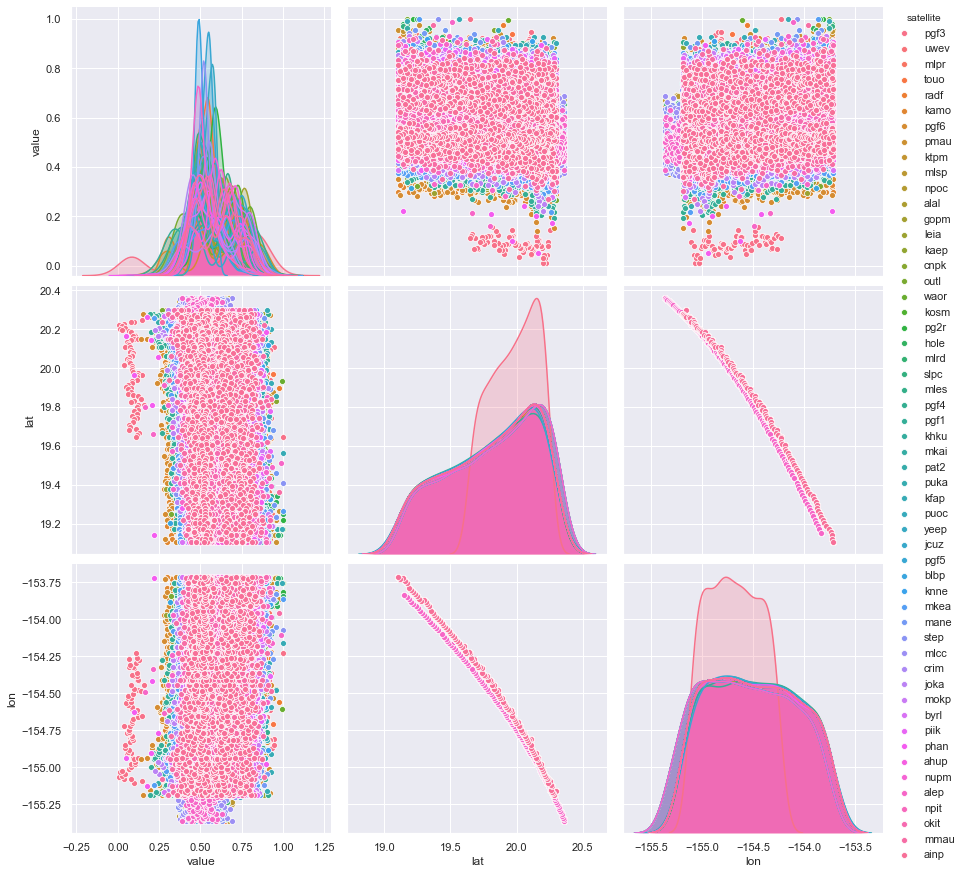

In [460]:
sns.pairplot(geo_df_dstecdt, hue="satellite", height=4)

### Boxplot of dStec/dt Values

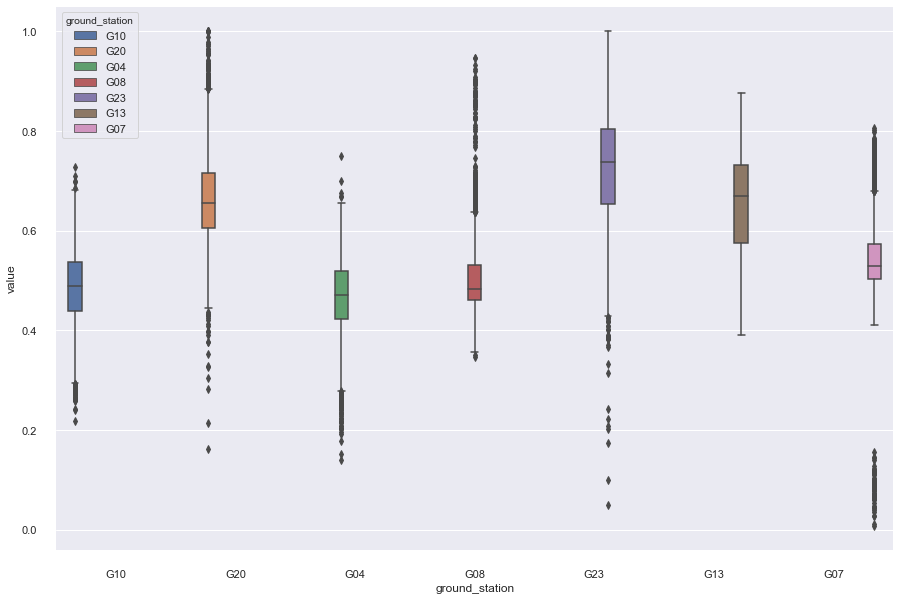

In [461]:
plt.figure(figsize=(15,10))
sns.boxplot(x="ground_station", y="value",
            hue="ground_station",
            data=geo_df_dstecdt)
sns.despine(offset=10, trim=True)

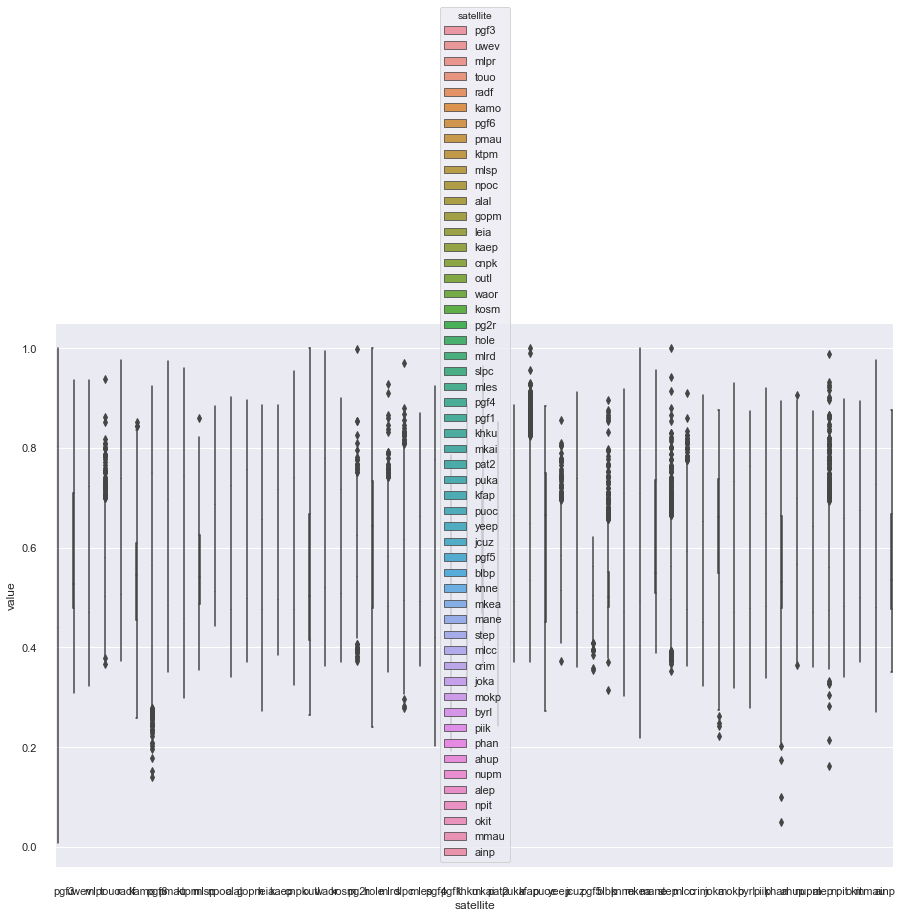

In [462]:
plt.figure(figsize=(15,10))
sns.boxplot(x="satellite", y="value",
            hue="satellite",
            data=geo_df_dstecdt)
sns.despine(offset=10, trim=True)

### QQ Plot

In [ ]:
fg = (
    sns.FacetGrid(data=geo_df_dstecdt, row='satellite', col='ground_station', margin_titles=True, height=4)
        .map(probscale.probplot, 'value', probax='y', bestfit=True)
#         .set_ylabels('s')
        .add_legend()
)

In [ ]:
# def geographic(dataframe: 'pd.DataFrame', zoom: int = 5, max_size: int = 5) -> None: 
#     """
#     Plots a geographic plot (cartesian coordinates) of variations through 
#     time of the slant total electron content (dStec/dt). 
    
#     :param dataframe: a Pandas dataframe containing columns 'lat', 'lon', and 'value'
#     :param zoom: the zoom level for the plot, default 5
#     :param center_coordinates: latitude and longitude coordinates (list of length 2) in which 
#     to center the plot
#     """
    
#     # generate the base figure
#     fig = px.scatter_mapbox(
#         dataframe, 
#         lat="lat", 
#         lon="lon", 
#         color="value",
#         color_continuous_scale=px.colors.cyclical.IceFire, 
#         zoom=zoom
#     )

#     # update the layout
#     fig.update_layout(
#         showlegend = False,
#         title="Slant Total Electron Content (dStec/dt) Variations through Time"
#     )

#     # plot
#     fig.show()


In [ ]:
geographic(
#     dataframe=geo_df_dstecdt, 
#     zoom=5.5
# )# 

In [ ]:
# projection="natural earth"

## Summary and Notes 

* Blah Blah 